In [37]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import scipy.sparse as sp
import numpy as np
import torch 
from recommandation_propre import *
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from tsne import *
from sklearn.manifold import TSNE

torch.set_default_tensor_type('torch.DoubleTensor')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Préliminaires

In [2]:
def loadMovieLens(path='/data/movielens'):
    # Get movie titles
    movies={}
    for line in open(path+'/u.item'):
        (id,title)=line.split('|')[0:2]
        movies[id]=title
    # Load data
    prefs ={}
    for line in open(path+'/u.data'):
        (user,movieid,rating,ts)=line.split('\t')
        prefs.setdefault(user,{})
        prefs[user][movies[movieid]]=float(rating)
    return prefs

In [3]:
data = loadMovieLens('./ml-100k')

In [4]:
new = {}
for dic in data:
    new[int(dic)]=data[dic]

In [5]:
df = pd.DataFrame(new)

In [6]:
mtx = sp.csr_matrix(df.replace(np.nan, 0).values)

In [7]:
mtx

<1664x943 sparse matrix of type '<class 'numpy.float64'>'
	with 99693 stored elements in Compressed Sparse Row format>

# Visualisation des données

## SVD

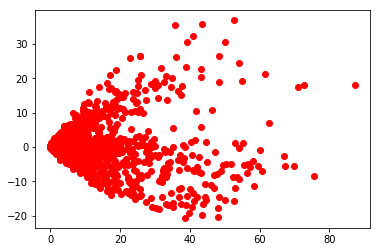

In [8]:
svd_films = TruncatedSVD()
svd_films.fit(mtx)
red_mtx_films = svd_films.fit_transform(mtx)

plt.plot(red_mtx_films[:,0],red_mtx_films[:,1],'ro')
plt.show()

[0.15435838 0.04821751]


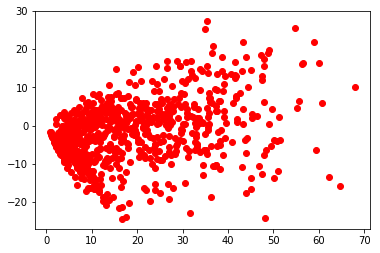

In [9]:
svd_users = TruncatedSVD()
svd_users.fit(mtx.transpose())
red_mtx_users = svd_users.fit_transform(mtx.transpose())

print(svd_users.explained_variance_ratio_)

plt.plot(red_mtx_users[:,0],red_mtx_users[:,1],'ro')
plt.show()

## NMF

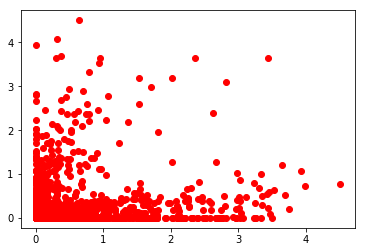

In [10]:
nmf_films = NMF(n_components=2, init='random', random_state=0)
nmf_films.fit(mtx)
nmf_mtx_films = nmf_films.fit_transform(mtx)

plt.plot(nmf_mtx_films[:,0],nmf_mtx_films[:,1],'ro')
plt.show()

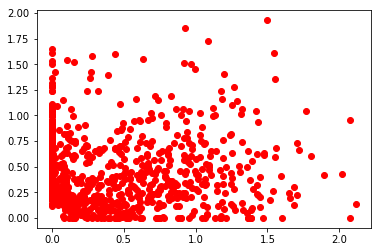

In [12]:
nmf_users = NMF(n_components=2, init='random', random_state=0)
nmf_users.fit(mtx.transpose())
nmf_mtx_users = nmf_users.fit_transform(mtx.transpose())

plt.plot(nmf_mtx_users[:,0],nmf_mtx_users[:,1],'ro')
plt.show()

## PCA from tsne

In [18]:
data_array = np.array(df.replace(np.nan, 0))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 4., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Preprocessing the data using PCA...


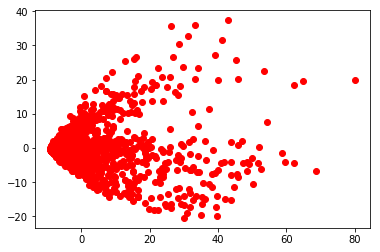

In [25]:
Y_films = pca(data_array, 2)
plt.plot(Y_films[:,0],Y_films[:,1],'ro')
plt.show()

Preprocessing the data using PCA...


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


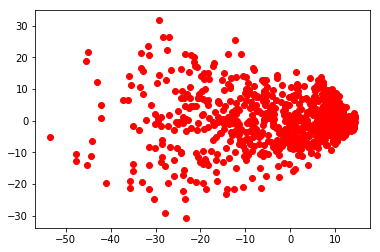

In [26]:
Y_users = pca(data_array.transpose(), 2)
plt.plot(Y_users[:,0],Y_users[:,1],'ro')
plt.show()

## tsne from tsne

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1664...


C:\Users\Juliette\Dropbox\ecole_ing\DAC\FDMS\FDMS\TME5\tsne.py:28: RuntimeWarning: divide by zero encountered in log
  H = np.log(sumP) + beta * np.sum(D * P) / sumP
C:\Users\Juliette\Dropbox\ecole_ing\DAC\FDMS\FDMS\TME5\tsne.py:28: RuntimeWarning: invalid value encountered in true_divide
  H = np.log(sumP) + beta * np.sum(D * P) / sumP
C:\Users\Juliette\Dropbox\ecole_ing\DAC\FDMS\FDMS\TME5\tsne.py:29: RuntimeWarning: invalid value encountered in true_divide
  P = P / sumP
C:\Users\Juliette\Dropbox\ecole_ing\DAC\FDMS\FDMS\TME5\tsne.py:64: RuntimeWarning: invalid value encountered in greater
  while np.abs(Hdiff) > tol and tries < 50:


Computing P-values for point 500 of 1664...
Computing P-values for point 1000 of 1664...
Computing P-values for point 1500 of 1664...
Mean value of sigma: 3.486539


C:\Users\Juliette\Dropbox\ecole_ing\DAC\FDMS\FDMS\TME5\tsne.py:163: RuntimeWarning: invalid value encountered in greater
  gains = (gains + 0.2) * ((dY > 0.) != (iY > 0.)) + \
C:\Users\Juliette\Dropbox\ecole_ing\DAC\FDMS\FDMS\TME5\tsne.py:164: RuntimeWarning: invalid value encountered in greater
  (gains * 0.8) * ((dY > 0.) == (iY > 0.))


Iteration 10: error is nan
Iteration 20: error is nan
Iteration 30: error is nan
Iteration 40: error is nan
Iteration 50: error is nan
Iteration 60: error is nan
Iteration 70: error is nan
Iteration 80: error is nan
Iteration 90: error is nan
Iteration 100: error is nan


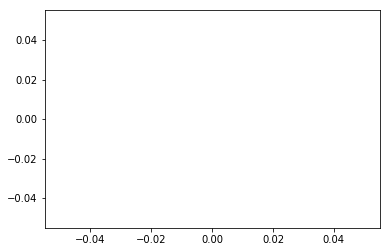

In [36]:
t_users = tsne(data_array, 2)
plt.plot(t_users[:,0],t_users[:,1],'ro')
plt.show()

In [30]:
data_array.shape

(1664, 943)

## tsne from sklearn

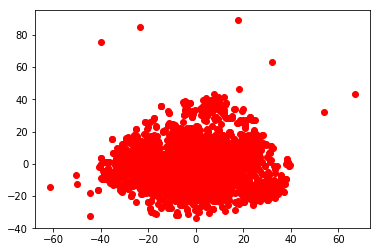

In [42]:
tsne_films = TSNE(n_components=2)
tsne_films.fit(data_array)
tsne_mtx_films = tsne_films.fit_transform(data_array)

plt.plot(tsne_mtx_films[:,0],tsne_mtx_films[:,1],'ro')
plt.show()

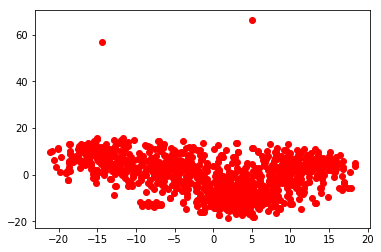

In [41]:
tsne_users = TSNE(n_components=2)
tsne_users.fit(data_array.transpose())
tsne_mtx_users = tsne_users.fit_transform(data_array.transpose())

plt.plot(tsne_mtx_users[:,0],tsne_mtx_users[:,1],'ro')
plt.show()

#  Set de données

In [73]:
df_train ,test = cut_train_test(df)

length test : 2606.0
ration test/train: 0.02614025056924759


#  Base Line

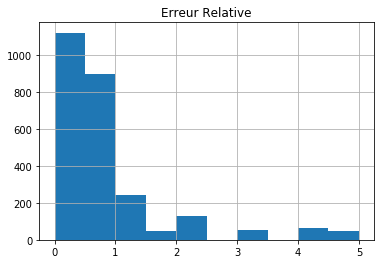

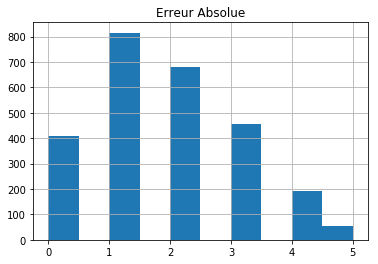

In [74]:
rec_rand = Recommandation()
df_rel = rec_rand.random_score(test, rel_error)
df_abs = rec_rand.random_score(test, abs_error)

df_rel.columns = ['Erreur Relative']
df_abs.columns = ['Erreur Absolue']

df_rel.hist()
df_abs.hist()

df_results = pd.concat([df_rel.describe(),df_abs.describe()], axis = 1)
writer = pd.ExcelWriter('random_scores.xlsx')
df_results.to_excel(writer,'Sheet1')
writer.save()

In [75]:
note_mean = round(df_train.mean().mean(),0)
note_mean

4.0

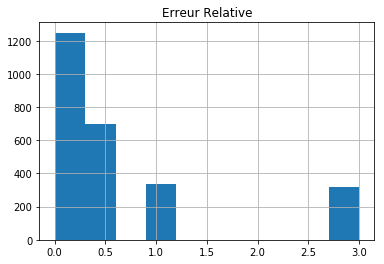

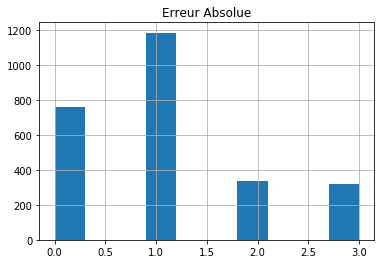

In [76]:
rec_cst = Recommandation()
df_rel = rec_rand.cst_score(test, note_mean,rel_error)
df_abs = rec_rand.cst_score(test, note_mean,abs_error)

df_rel.columns = ['Erreur Relative']
df_abs.columns = ['Erreur Absolue']

df_rel.hist()
df_abs.hist()

df_results = pd.concat([df_rel.describe(),df_abs.describe()], axis = 1)
writer = pd.ExcelWriter('cst_scores.xlsx')
df_results.to_excel(writer,'Sheet1')
writer.save()

In [77]:
pd.concat([df_rel,df_abs], axis = 1)

,Erreur Relative,Erreur Absolue
0,0.333333,1.0
1,0.200000,1.0
2,3.000000,3.0
3,0.000000,0.0
4,0.333333,1.0
5,0.333333,1.0
6,0.200000,1.0
7,0.000000,0.0
8,0.200000,1.0
9,0.333333,1.0


# Question 1

In [93]:
model_svd = TruncatedSVD(n_components=2,n_iter=2)
rec_syst_svd = Recommandation(model_svd)
rec_syst_svd.fit(df_train)

In [94]:
rec_syst_svd.score(test, rel_error).describe()

,0
count,2606.000000
mean,0.844167
std,0.245379
min,0.000000
25%,0.750000
50%,1.000000
75%,1.000000
max,3.000000


# Question 2

In [15]:
model_nmf = NMF(n_components=25, init='random', random_state=0)
rec_syst_nmf = Recommandation(model_nmf)
rec_syst_nmf.fit(df_train)

In [16]:
rec_syst_nmf.score(test, rel_error)

,0
count,2607.000000
mean,0.749022
std,0.298211
min,0.000000
25%,0.500000
50%,0.800000
75%,1.000000
max,2.000000


#  Question 3

Source : https://tel.archives-ouvertes.fr/tel-01005223/document

## Sans L2

In [78]:
dim = 2
epsilon = 1e-3
reg_q = 0
reg_p = 0
max_iter = 5

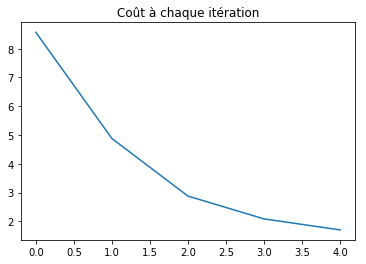

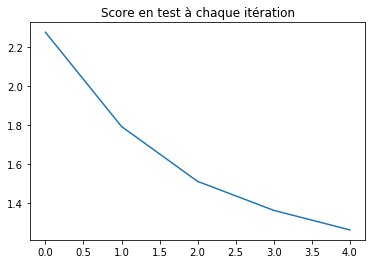

In [79]:
rec_syst = Recommandation()
cost, res_test = rec_syst.fit_SGD_stoch(df_train, dim, epsilon, reg_q, reg_p, max_iter,test)

plt.title('Coût à chaque itération')
plt.plot(range(len(cost)),cost)
plt.show()
plt.title('Score en test à chaque itération')
plt.plot(range(len(res_test)),res_test)
plt.show()

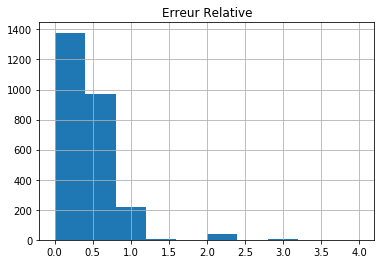

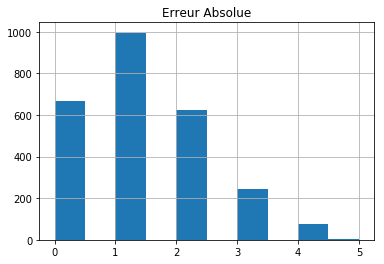

In [80]:
df_rel = rec_syst.score(test, rel_error)
df_abs = rec_syst.score(test, abs_error)

df_rel.columns = ['Erreur Relative']
df_abs.columns = ['Erreur Absolue']

df_rel.hist()
df_abs.hist()

df_results = pd.concat([df_rel.describe(),df_abs.describe()], axis = 1)
writer = pd.ExcelWriter('sans_L2_scores.xlsx')
df_results.to_excel(writer,'Sheet1')
writer.save()

## Avec L2

In [81]:
dim = 2
epsilon = 1e-3
reg_q = 0.001
reg_p = 0.001
max_iter = 5

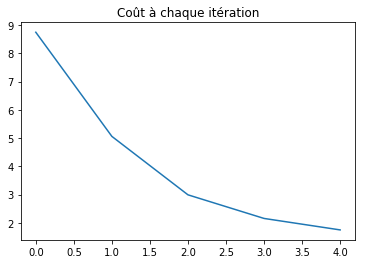

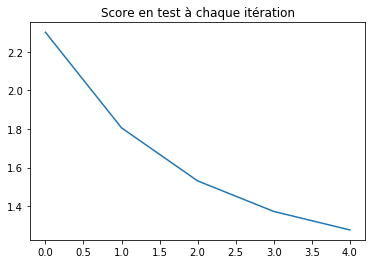

In [82]:
rec_syst = Recommandation()
cost,res_test = rec_syst.fit_SGD_stoch(df_train, dim, epsilon, reg_q, reg_p, max_iter,test)

plt.title('Coût à chaque itération')
plt.plot(range(len(cost)),cost)
plt.show()

plt.title('Score en test à chaque itération')
plt.plot(range(len(res_test)),res_test)
plt.show()

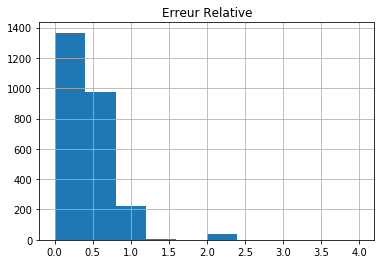

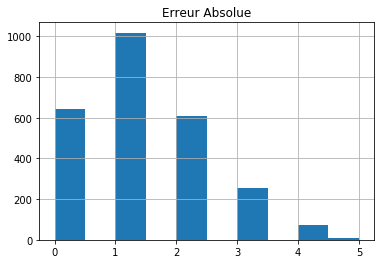

In [83]:
df_rel = rec_syst.score(test, rel_error)
df_abs = rec_syst.score(test, abs_error)

df_rel.columns = ['Erreur Relative']
df_abs.columns = ['Erreur Absolue']

df_rel.hist()
df_abs.hist()

df_results = pd.concat([df_rel.describe(),df_abs.describe()], axis = 1)
writer = pd.ExcelWriter('avec_L2_scores.xlsx')
df_results.to_excel(writer,'Sheet1')
writer.save()

# Question 4

In [87]:
dim = 2
epsilon = 1e-3
reg_q = 0.001
reg_p = 0.001
max_iter = 5

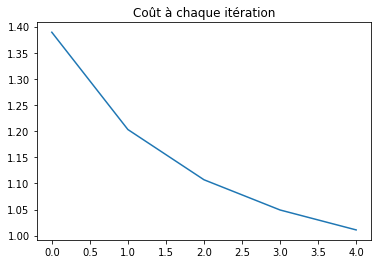

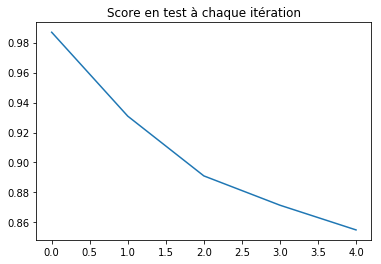

In [88]:
rec_syst_biais = Recommandation()
cost,res_test = rec_syst_biais.fit_SGD_stoch_biais(df_train, dim, epsilon, reg_q, reg_p, max_iter,test)

plt.title('Coût à chaque itération')
plt.plot(range(len(cost)),cost)
plt.show()

plt.title('Score en test à chaque itération')
plt.plot(range(len(res_test)),res_test)
plt.show()

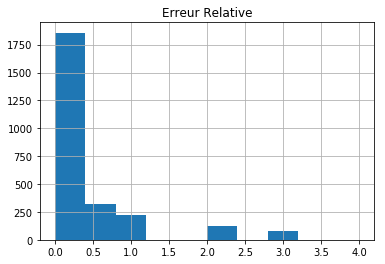

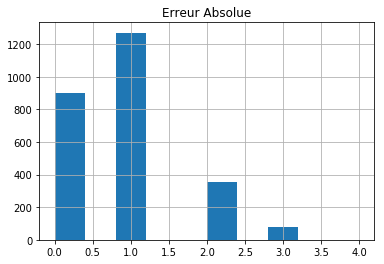

In [89]:
rec_syst_biais.score_biais(test, rel_error)

df_rel = rec_syst_biais.score_biais(test, rel_error)
df_abs = rec_syst_biais.score_biais(test, abs_error)

df_rel.columns = ['Erreur Relative']
df_abs.columns = ['Erreur Absolue']

df_rel.hist()
df_abs.hist()

df_results = pd.concat([df_rel.describe(),df_abs.describe()], axis = 1)
writer = pd.ExcelWriter('biais_avec_L2_scores.xlsx')
df_results.to_excel(writer,'Sheet1')
writer.save()